## FINAL REPORT: Predicted Chest Pain Type in Cleveland, Ohio 
(Section 002, Group 31)

## Introduction

**Background:**
    Heart disease is the leading cause of death in the United States, including the city of Cleveland in Ohio. Factors that affect the probability of contracting heart disease include, unhealthy diet, high blood pressure, high cholesterol, minimal physical activity, etc. (“Heart disease,” 2022). While heart disease symptoms depend on the type of heart disease, many common symptoms include chest pain, shortness of breath, and pain in the neck, jaw, and throat. As noted, chest pain is often associated with heart disease. Particularly angina is a chest pain caused by poor blood flow to the heart due to the buildup of thick plaques on the inner walls of the arteries carrying blood to the heart, thereby restricting the heart’s supply of blood (“Chest pain,” 2023). Several genetic and lifestyle factors contribute to the risk of developing angina. For example, there is evidence of a positive relationship between age and developing angina; an increase of plaque build up in the arteries is correlated with an increase in age (“Causes and risk,” 2020).  

**Question:** Is it possible to predict chest pain type (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) for a given heart disease patient based on various revelent medical factors and patient information?

**Dataset:** Cleveland Heart Disease Processed Data set from https://archive.ics.uci.edu/ml/datasets/Heart+Disease. The sample size (ie. number of rows) of this dataset is 303. The database contains 76 attributes in total, though this specific set uses a subset of 14 of them, which can be viewed below as we read in the data. The data will be further described throughout our preliminary and exploratory data analysis. 

## Methods
### Explanotory Data Analysis
Here, we will read, tidy, summarize, and visualize the dataset. Ultimately in this section, we want to find our variables of interest to use as predictors for our classification model.

First, we will start by reading in the dataset from its URL code. The data is untidy - there are no column names, and some variables that should be categorical are categorized as numerical variables instead. We must tidy the data before continuing further data analysis. Our tidy data has proper readable column names, and the variables are correctly categorized (ie. categorical values are listed numerically), which may be unhelpful when trying to visualize and understand the data in R. It is much easier to do data analysis and build a classification model from tidy data. 


We will rename the columns so that they are named as the correct variable as listed in the Cleveland Heart Disease Dataset description. Then, since we are not using all the variables given in the dataset, we will select specific columns based on our variables of interest to clean and wrangle the data further. For instance, some columns are unspecified or don't have enough information on their meaning from the website (`thal`, `oldpeak`, `slope`, `ca`, and `num`), and when tested further there proved to be no significant relationship that would deem them as possible predictor variables in predicting chest pain type and so we decided not to include them in our data analysis. In addition, `slope` and `ca` contain question marks(?) which designate them as character types rather than integers, and we will therefore exclude them from consideration. Next, we will mutate certain variables (`cp`, `sex`, and `exang`) and change the type of character they were listed as, so that they are categorical and not numerical. 

#### Attach necessary libraries
The following code loads five different R packages which helps us with various tasks in our data analysis, visualization, and modeling.

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)
library(gridExtra)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.2.0     ✔ tune         1.1.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.0     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recip

#### Import the dataset
The dataset is imported using the `read_csv` function from the R package we attached above.

In [2]:
#read data
#add names to columns based on information from website
#clean and wrangle data
#select columns within the dataset corresponding with our selected variables of interest 
#mutate certain rows to change the type of character a variable is listed as 

data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                           col_names = FALSE)

tail(data)


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*figure1: Cleveland heart disease dataset (raw)*

As illustrated in Figure 1, the dataset lacks column names and has missing data in the `X12` column, which is denoted by a question mark '?'. Additionally, some categorical values are incorrectly labeled as `dbl` and need to be properly tidied.

#### Clean and Wrangle the data
First we rename the columns in the dataset by using more descriptive names, and stores the resulting dataset in a new variable `heart_data`."

In [7]:
heart_data <-
        rename(data, age = X1,
            sex = X2,
            cp = X3,
            restbp = X4,
            chol = X5,
            fbs = X6, 
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) 

head(heart_data)

age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


*figure 2: Cleveland heart disease dataset with column names*

Now, we create a new dataset `filter_data` by performing the following operations on the `heart_data` dataset.

In [11]:
filter_data <- heart_data %>%
    select(cp, age, restbp, chol, thalach, sex, exang) %>%
    mutate(cp = as_factor(cp)) %>%
    mutate(sex = as_factor(sex)) %>%
    mutate(exang = as_factor(exang))
head(filter_data)

cp,age,restbp,chol,thalach,sex,exang
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,63,145,233,150,1,0
4,67,160,286,108,1,1
4,67,120,229,129,1,1
3,37,130,250,187,1,0
2,41,130,204,172,0,0
2,56,120,236,178,1,0


*figure3: Cleveland heart disease dataset, filtered for our data analysis*

Now the resulting `filter_data` dataset contains a subset of columns from the original dataset, with some of the columns converted to factor variables for proper statistical analysis

#### Creating the train/test split
Now, we will split the data into a training and testing set. Our split ratio will be 75:25, meaning that 75% of our data will end up in the training set while the remaining 25% will end up in the testing set. This ensures there is a representative and sizable subset of the data for both capturing the characteristics of the data and evaluating the model's performance. Since splitting the data is a randomized process, we used the function `set.seed` to ensure reproducibility. In testing the performance of the classifier on new unseen data, we can ensure that the model is reliable and accurate in predicting chest pain type and can be generalized to new data.

In [12]:
#split data into training and testing, with 75% of data as training.
set.seed(2000)

heart_split <- initial_split(filter_data, prop = 0.75, strata=cp)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

#### Summarize the data
Here we calculate the count and percentage of each chest pain type, as well as the mean and median of age, resting blood pressure, cholesterol, and maximum heart rate. They are divided into three tables, each creating a new data frame by performing different operations for each chain type.

In [13]:
#using training data, summarize data into tables of count, mean values, and median values
count_cp <- heart_train %>%
    group_by(cp) %>%
    summarize(count = n()) %>%
    mutate(percent = 100*count/nrow(heart_train))
count_cp

cp,count,percent
<fct>,<int>,<dbl>
1,19,8.444444
2,36,16.000000
3,63,28.000000
4,107,47.555556


*figure4: Count and percentage of each chest pain type in our training dataset*

In [14]:
mean_variables <- heart_train %>%
    group_by(cp) %>%
    summarize(mean_age=mean(age, na.rm=TRUE),
             mean_restbp=mean(restbp, na.rm=TRUE),
             mean_chol=mean(chol, na.rm=TRUE),
             mean_thalach=mean(thalach, na.rm=TRUE))
mean_variables

cp,mean_age,mean_restbp,mean_chol,mean_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,56.52632,140.6316,239.7895,153.8421
2,50.25000,127.7500,235.8333,163.9722
3,54.69841,130.3968,244.4603,155.2063
4,55.25234,132.6636,250.4393,142.0093


*figure5: Mean values of chosen variables according to chest pain type in training dataset*

In [15]:
median_variables <- heart_train %>%
    group_by(cp) %>%
    summarize(median_age=median(age, na.rm=TRUE),
             median_restbp=median(restbp, na.rm=TRUE),
             median_chol=median(chol, na.rm=TRUE),
             median_thalach=median(thalach, na.rm=TRUE))
median_variables

cp,median_age,median_restbp,median_chol,median_thalach
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,59,140,234,155
2,51,128,225,165
3,54,130,240,157
4,57,130,248,143


*figure6: Median values of chosen variables according to chest pain type in training dataset*

Based on our summary data above, we can interpret some of the relationships and trends between `cp` and the variables of interest. We can see that a majority of our data contains points for `cp` = 4, making asymptomic angina the most common type of angina within our dataset. 

#### Visualize the predictors and target variable
We will now visualize some of our data to see how different variables relate to each other, and how they relate to chest pain. We will generate several types of visualizations, each of them coloured by chest pain type so we can see how the variables relate to each other and to chest pain type.

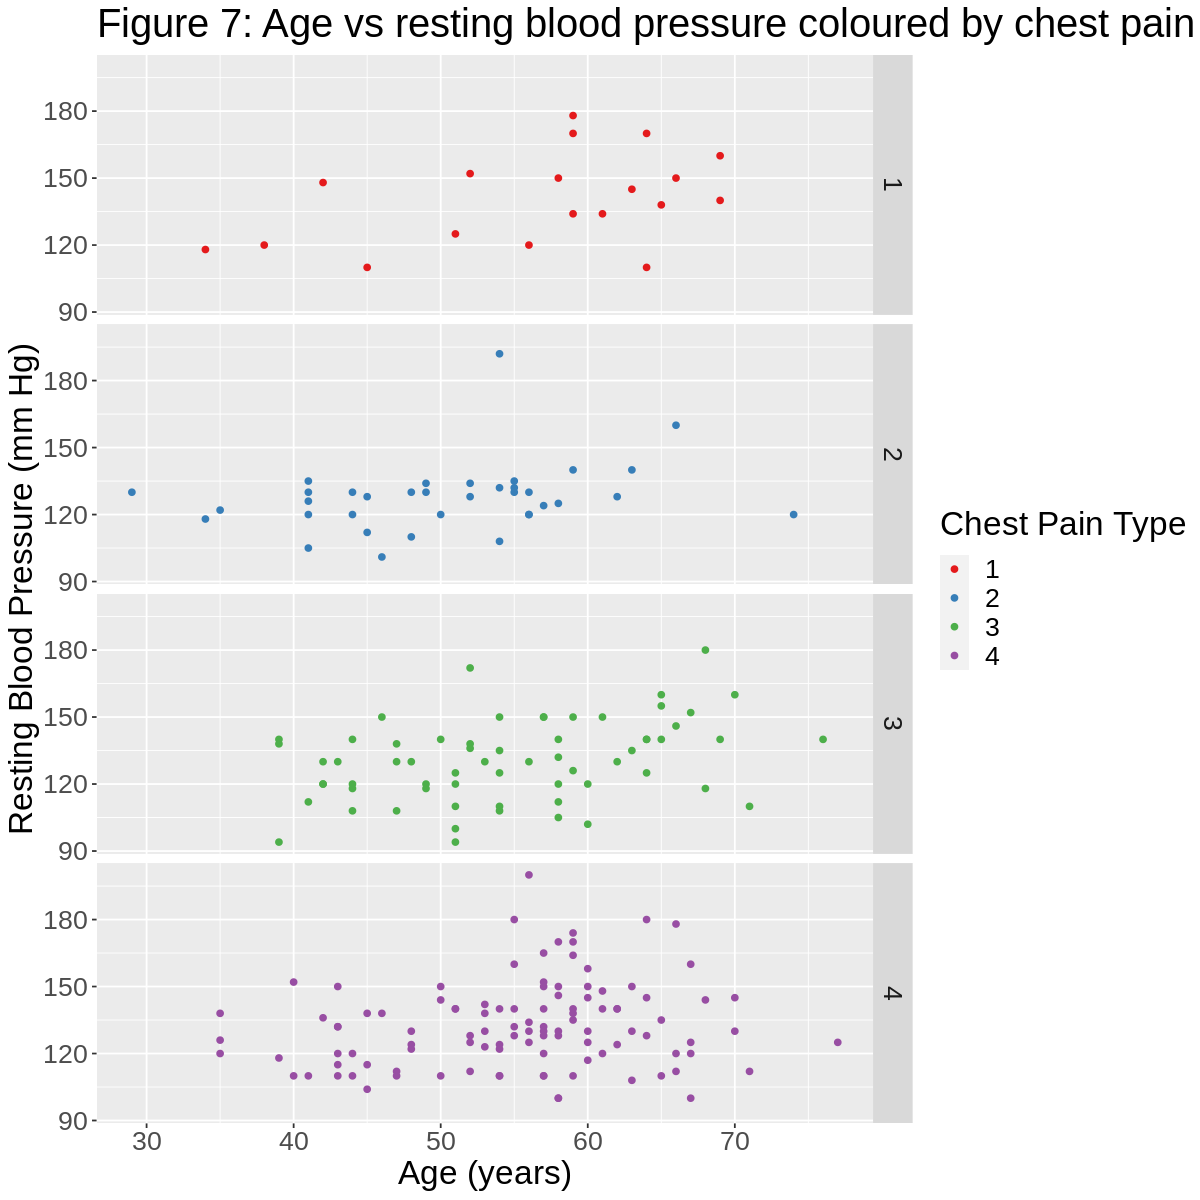

In [19]:
#using training data, visualize numeric predictors against each other to see distribution of data

options(repr.plot.height = 10, repr.plot.width = 10)

restbp_plot <- heart_train %>%  
    ggplot(aes(x=age, 
               y= restbp, 
               colour = cp)) +
        labs(title = "Figure 7: Age vs resting blood pressure coloured by chest pain type",
             x = "Age (years)",
             y = "Resting Blood Pressure (mm Hg)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
restbp_plot

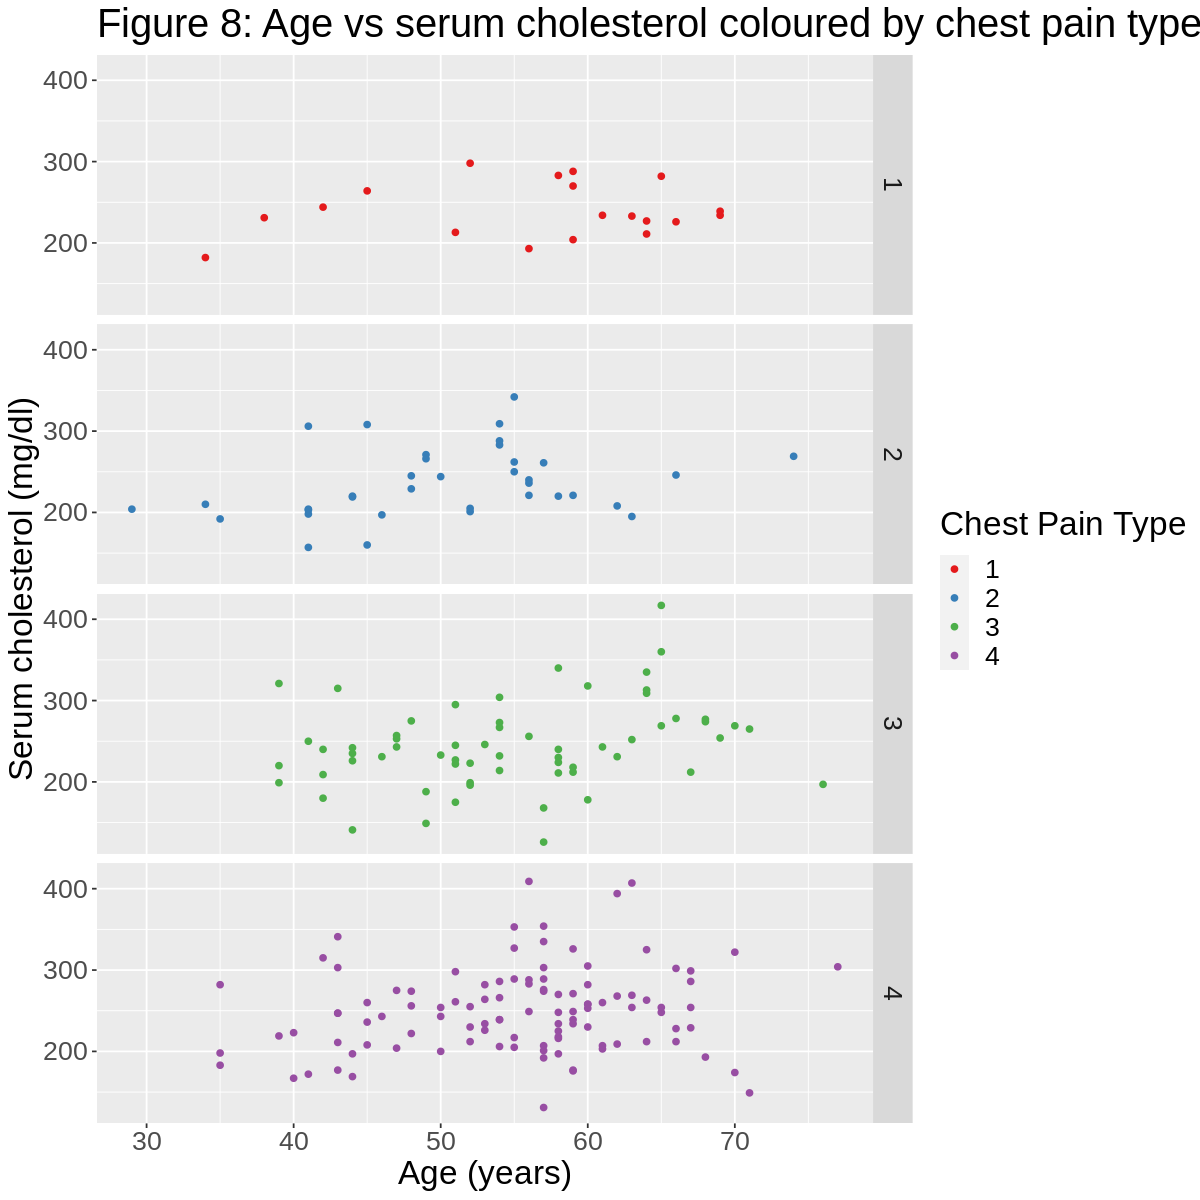

In [20]:
chol_plot <- heart_train %>%  
    ggplot(aes(x=age, 
               y= chol, 
               colour = cp)) +
        labs(title = "Figure 8: Age vs serum cholesterol coloured by chest pain type",
             x = "Age (years)",
             y = "Serum cholesterol (mg/dl)",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
chol_plot

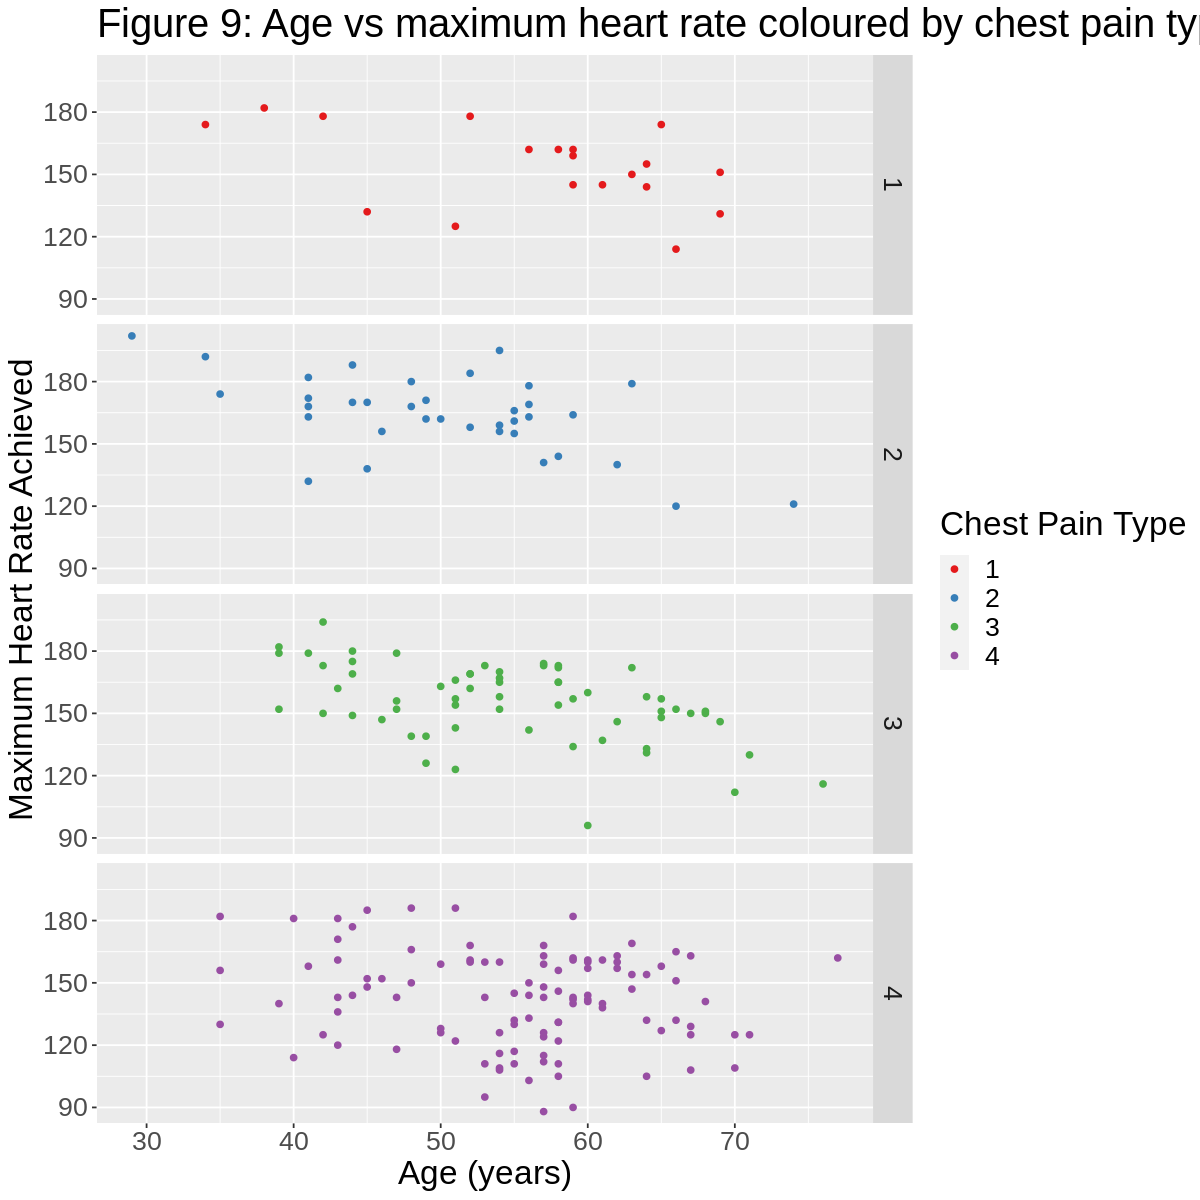

In [21]:
thalach_plot <- heart_train %>%  
    ggplot(aes(x=age, 
               y= thalach, 
               colour = cp)) +
        labs(title = "Figure 9: Age vs maximum heart rate coloured by chest pain type",
             x = "Age (years)",
             y = "Maximum Heart Rate Achieved",
            colour = 'Chest Pain Type') +
        geom_point() +
        facet_grid(rows = vars(cp)) +
        scale_color_brewer(palette = "Set1") +
    theme(text = element_text(size = 20)) 
thalach_plot

In [22]:
library(GGally)
library(broom)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


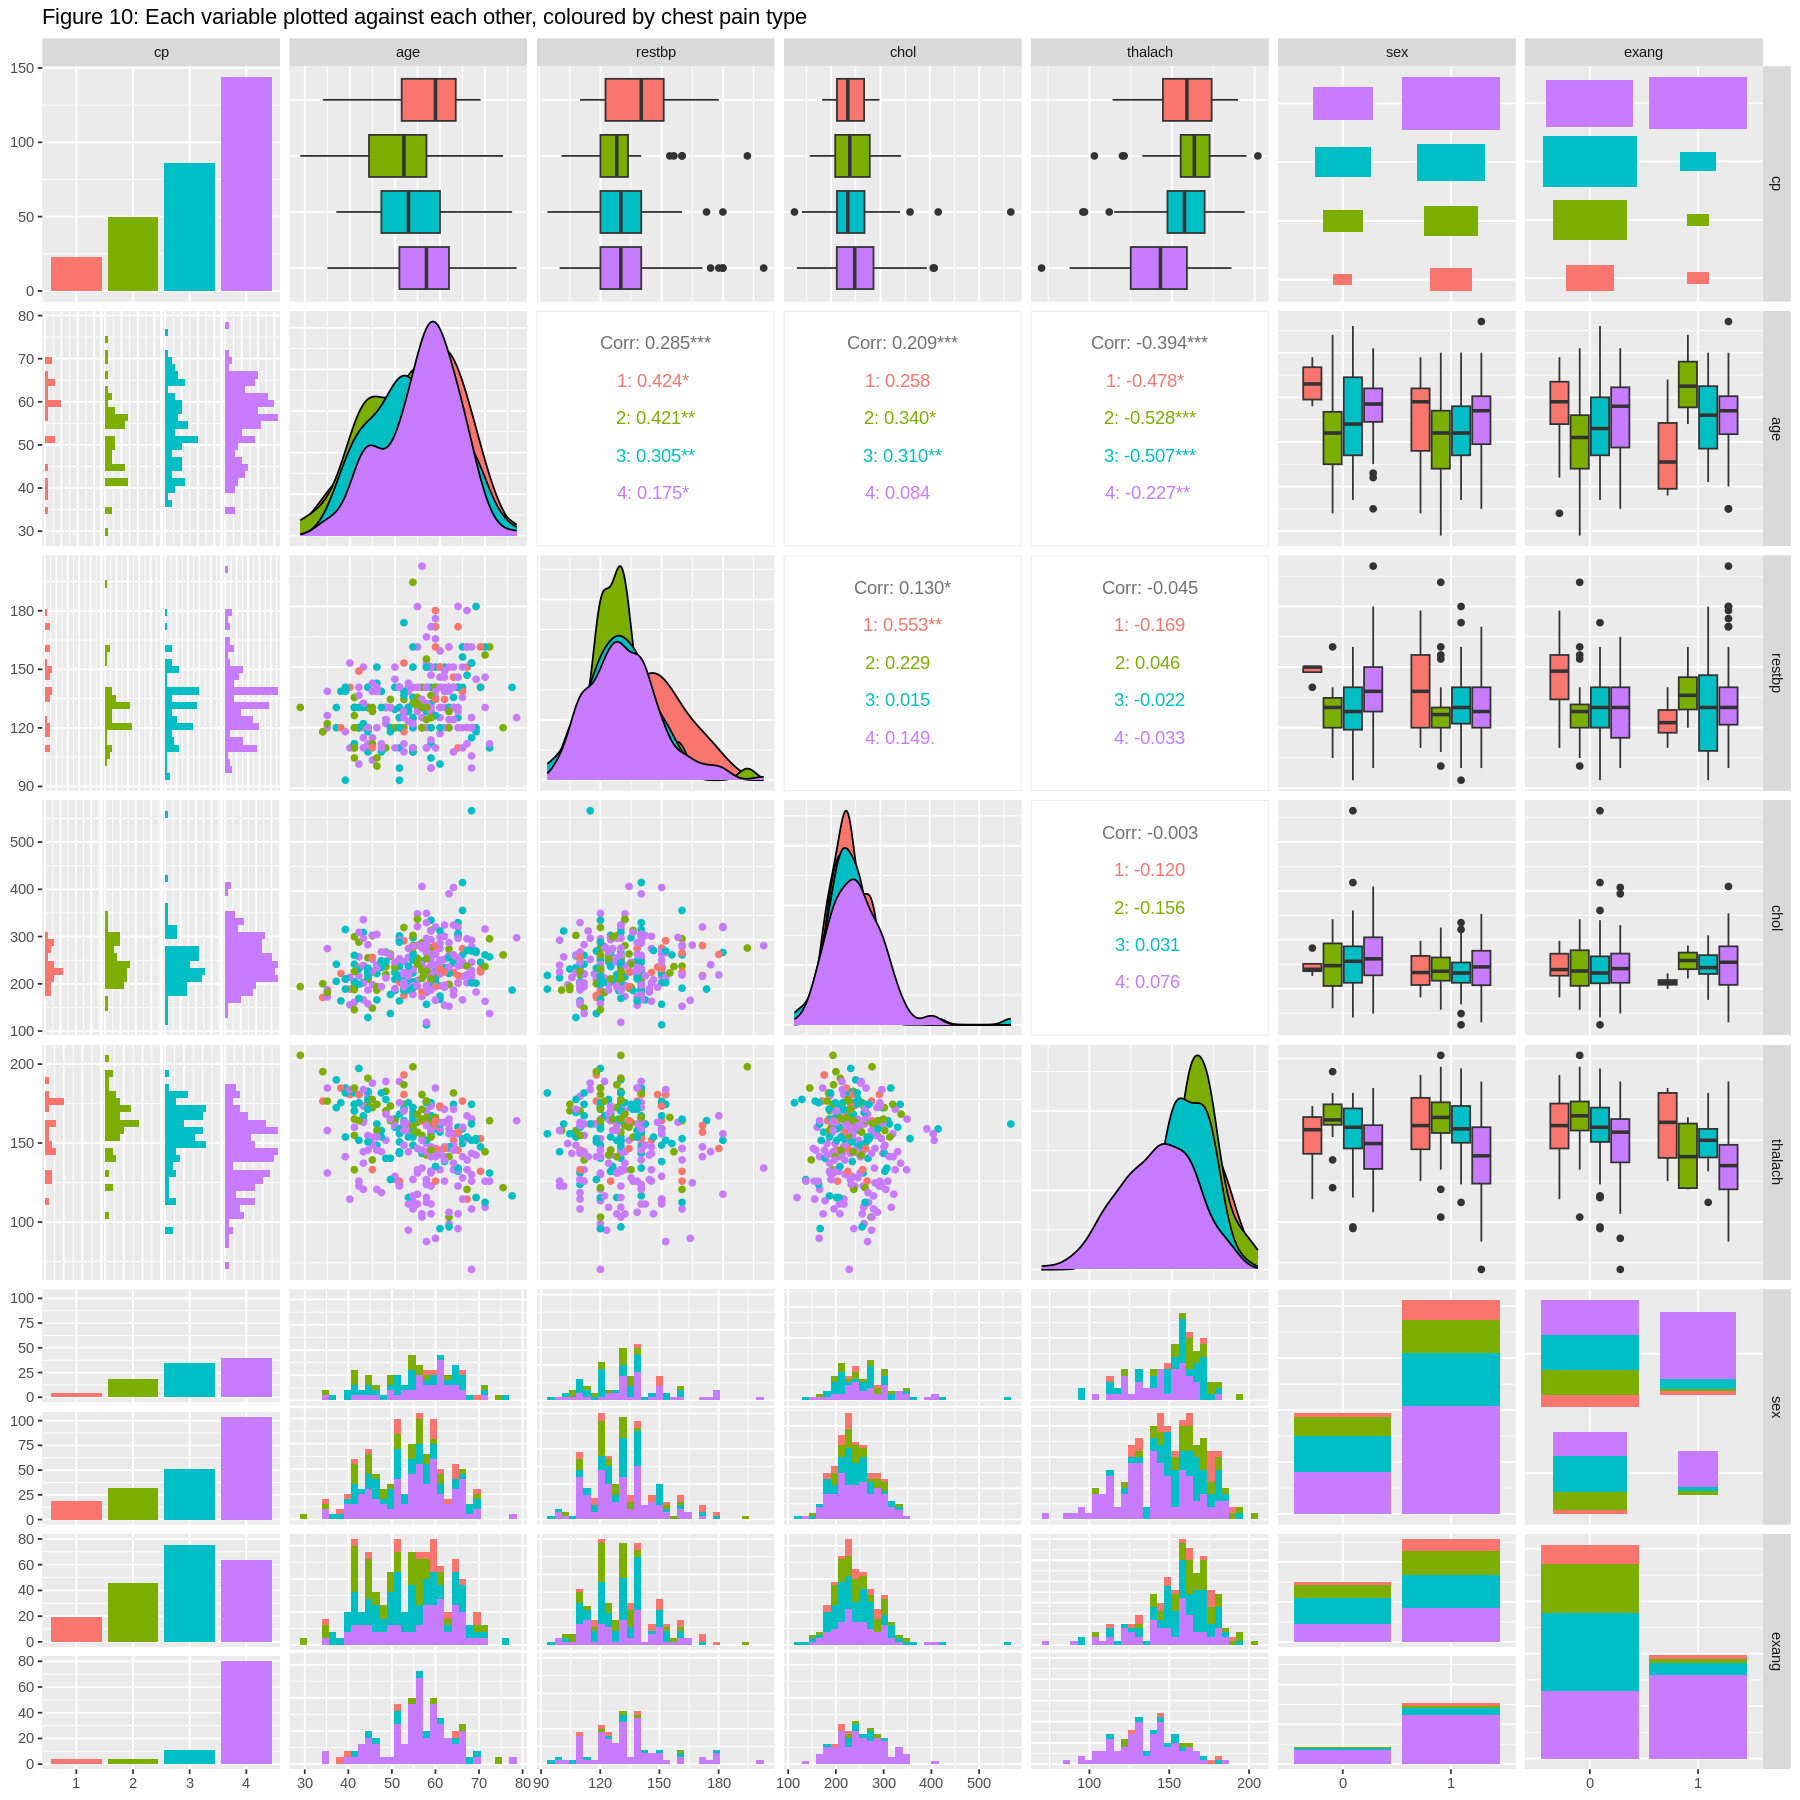

In [24]:
options(repr.plot.height = 15, repr.plot.width = 15)

heart_pairs <- filter_data %>%
    ggpairs(mapping=ggplot2::aes(colour = cp),
            title = "Figure 10: Each variable plotted against each other, coloured by chest pain type")
heart_pairs

As we can see from the visualization above of each variable (from the filtered data) compared against each other, none of them show entirely clear relationships, with regard to chest pain type. However, it seems that `age` and `thalach` (maximum heart rate) seem to shown some level of distinction with chest pain types (compared to the other plots). In general, the purple data points (4) are around the bottom, the blue (3) at the top, and the red and green (1 and 2) are moderately scattered throughout. The other plots are completely randomly scattered. Thus, we will use these variables as predictors for our classification model, however, it is likely that our classification model will not have a high accuracy.

In addition to our visualization analysis, we conducted literature research looking into what physical parameters were significant in predicting chest pain type. Research conducted by Li et al., (2021) revealed that through a chi-square analysis, `thalach` (maximum heart rate achieved) and `age` were among the most significant predictors. Similarly, another study by Indrakumari et al., (2020) using exploratory data analyses and the K-means algorithm to predict chest pain type based on several factors came to the same conclusion. Thus, we decided to use these variables as predictors for our classification model, however, it is likely that our classification model will not have a high accuracy based on the visualizations above.

#### Building the classification model

Now that we have decided to use `age` and `thalach` as the predictors for our classification model, we can move on to our planned data analysis. We will start with creating a recipe, a knn specification model (using the `tune` function to determine what $k$ value to use, and our classifier with the training data set. Then, we will perform a cross-fold validation and test the metrics with $k$ values from 2-20, and plot the data to find our ideal $k$ value.

In [38]:
library(kknn)

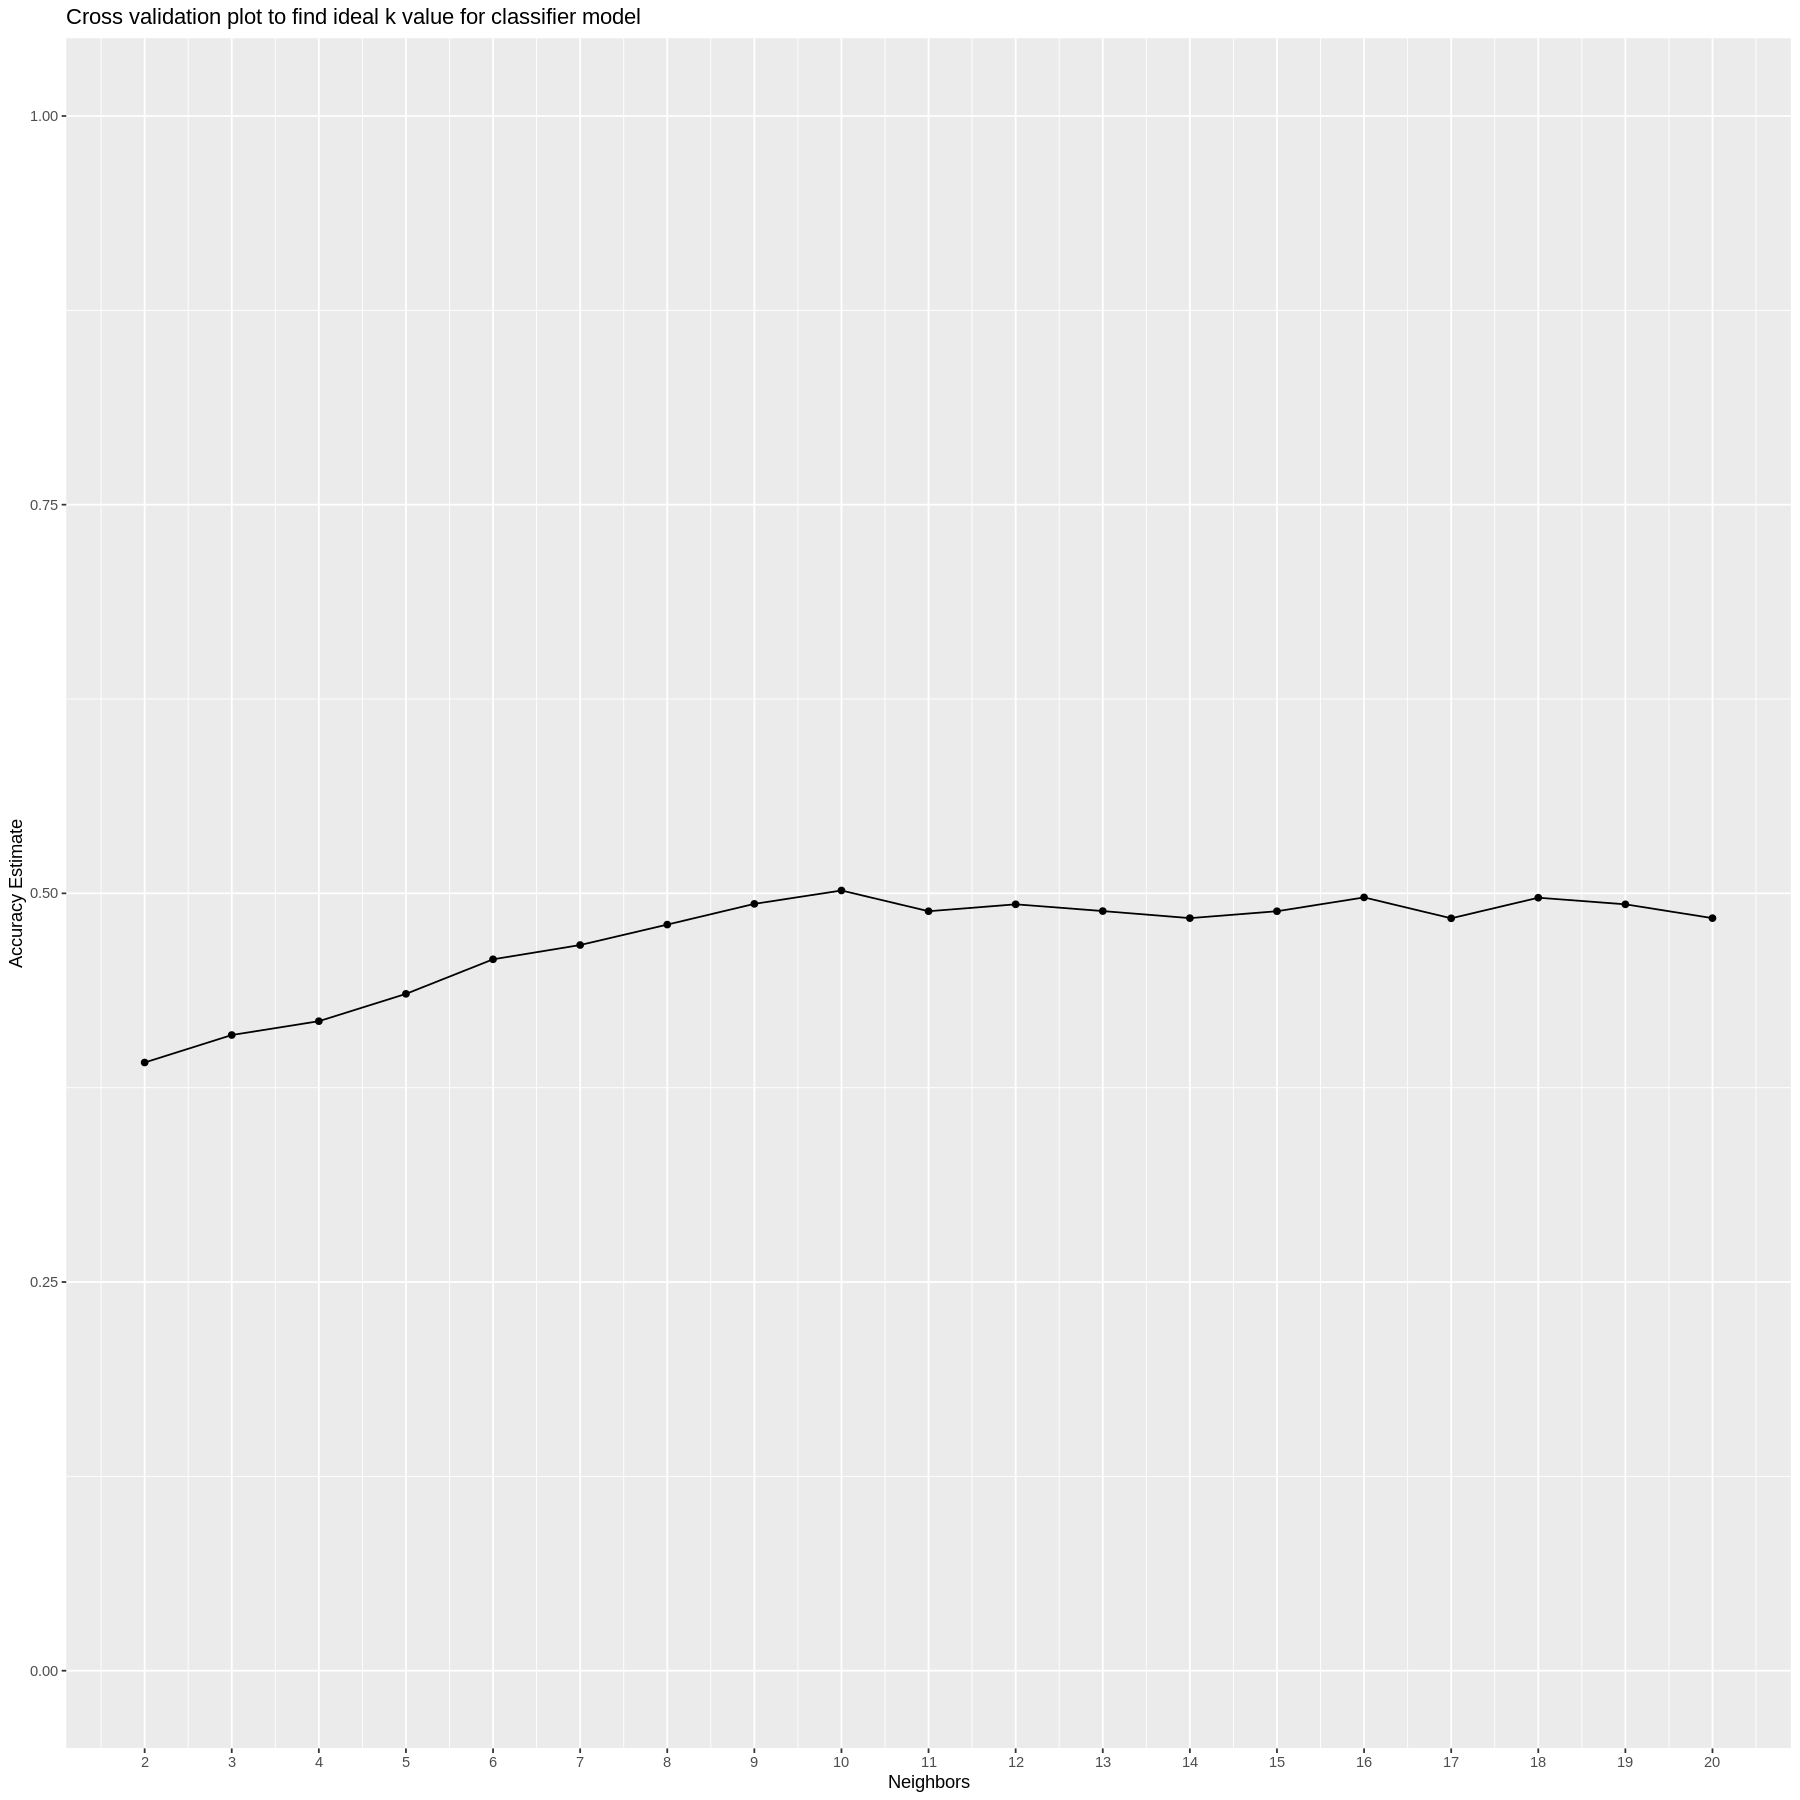

In [39]:
set.seed(1234) 

heart_recipe <- recipe(cp ~ age + thalach, data = heart_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
       set_engine("kknn") %>%
       set_mode("classification")

heart_vfold <- vfold_cv(heart_train, v = 5, strata = cp)

gridvals <- tibble(neighbors = seq(2, 20, 1))

heart_workflow <- workflow() %>%
       add_recipe(heart_recipe) %>%
       add_model(knn_spec) %>%
       tune_grid(resamples = heart_vfold, grid = gridvals) %>%
       collect_metrics()

accuracies <- heart_workflow %>%
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(title = "Cross validation plot to find ideal k value for classifier model", 
            x = "Neighbors", 
            y = "Accuracy Estimate") +
       scale_x_continuous(breaks = seq(0, 20, by = 1)) +  
       scale_y_continuous(limits = c(0, 1.0)) 
cross_val_plot

As we can see from the above plot, $k$=10 would be the best possible $k$ value, since its accuracy estimate is the highest among all the values plotted. We will now input that value into a new knn specification model and classifier.

In [40]:
set.seed(9999) 

new_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
       set_engine("kknn") %>%
       set_mode("classification")

heart_fit <- workflow() %>%
       add_recipe(heart_recipe) %>%
       add_model(new_knn_spec) %>%
       fit(data = heart_train)

Now that we have our final model, we can predict on the test dataset, and report the accuracy and confusion matrix of this prediction.

In [41]:
heart_predictions <- predict(heart_fit, heart_test) %>%
    bind_cols(heart_test)
heart_predictions

heart_metrics <- heart_predictions %>%
    metrics(truth = cp, estimate = .pred_class)
heart_metrics

heart_conf_mat <- heart_predictions %>%
    conf_mat(truth = cp, estimate = .pred_class)
head(heart_conf_mat)

.pred_class,cp,age,restbp,chol,thalach,sex,exang
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
3,3,37,130,250,187,1,0
2,4,53,140,203,155,1,1
4,2,56,140,294,153,0,0
3,2,44,120,263,173,1,0
4,2,58,120,284,160,1,0
4,4,60,130,206,132,1,1
3,3,50,120,219,158,0,0
3,3,44,130,233,179,1,1
3,4,42,140,226,178,1,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.4743590
kap,multiclass,0.1483356


$table
          Truth
Prediction  1  2  3  4
         1  0  0  0  0
         2  1  2  5  1
         3  2  6  8  9
         4  1  6 10 27


*figure12: Confusion matrix for our classifier model*

We will also visualize our classification model with the dataset to see what the model looks like.

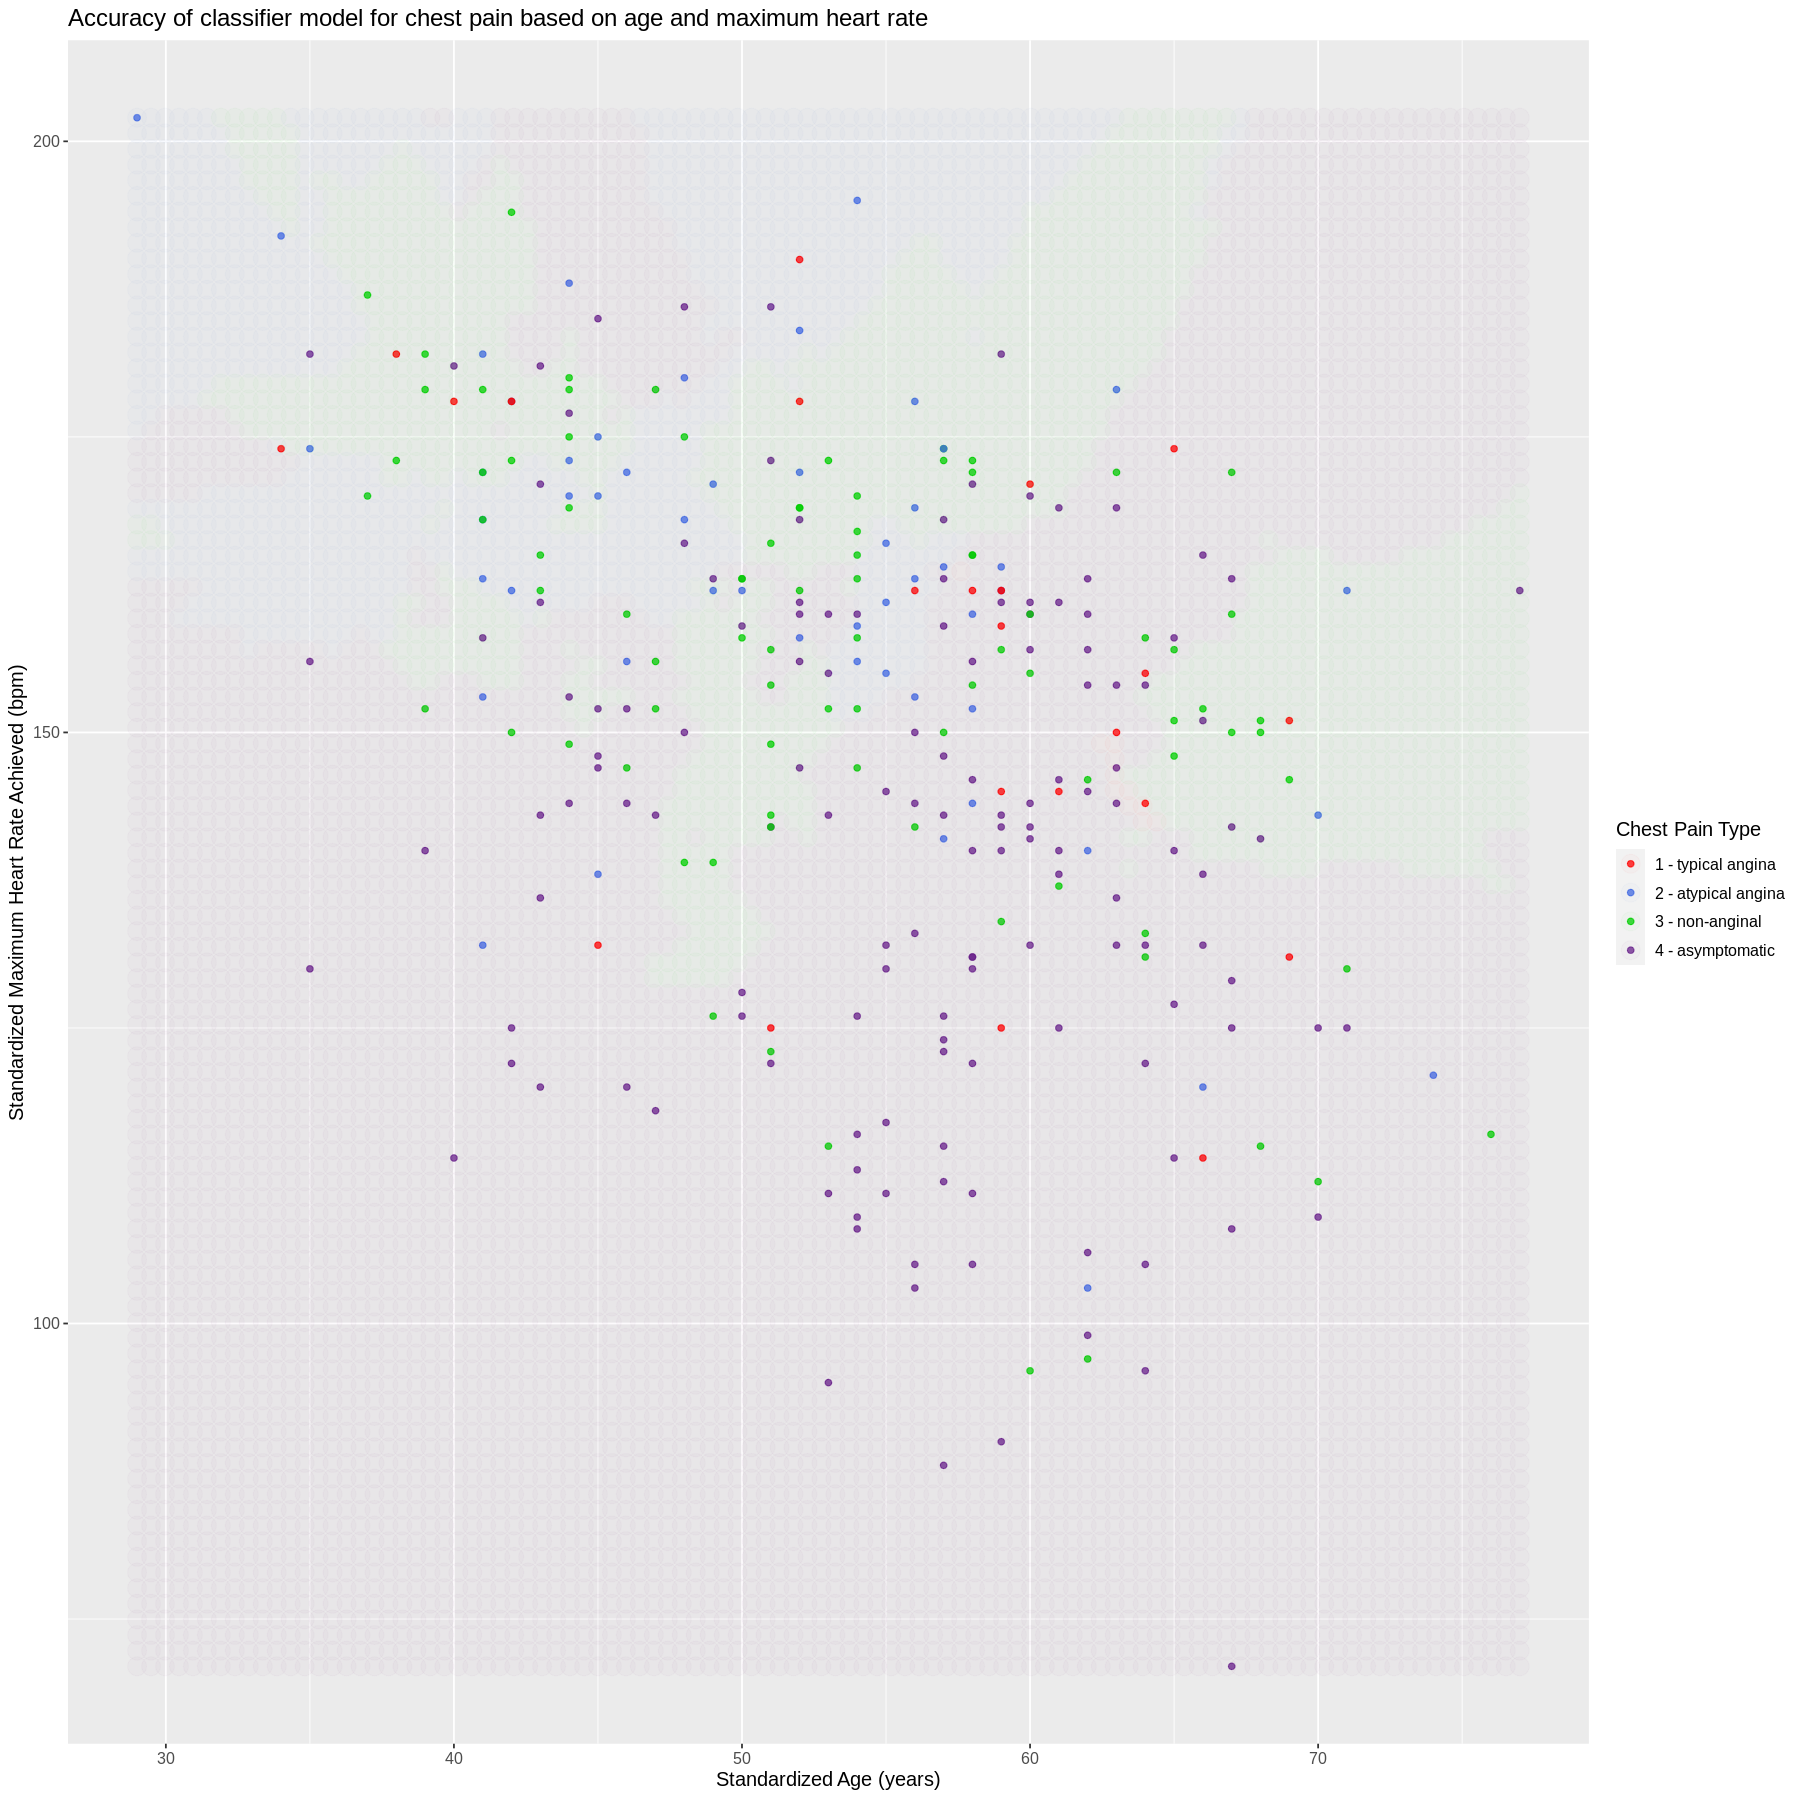

In [47]:
# create the grid of area/smoothness vals, and arrange in a data frame
age_grid <- seq(min(filter_data$age), 
                max(filter_data$age), 
                length.out = 100)
thalach_grid <- seq(min(filter_data$thalach), 
                max(filter_data$thalach), 
                length.out = 100)
asgrid <- as_tibble(expand.grid(age = age_grid, 
                                thalach = thalach_grid))

# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(heart_fit, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>% 
  rename(Class = .pred_class)

# plot:
# 1. the colored scatter of the original data
# 2. the faded colored scatter for the grid points
hrt_wkflw_plot <-
  ggplot() +
  geom_point(data = filter_data, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = cp), 
             alpha = 0.75) +
  geom_point(data = prediction_table, 
             mapping = aes(x = age, 
                           y = thalach, 
                           color = Class), 
             alpha = 0.02, 
             size = 5) +
  labs(color = "Chest Pain Type", 
       x = "Standardized Age (years)", 
       y = "Standardized Maximum Heart Rate Achieved (bpm)",
       title = "Accuracy of classifier model for chest pain based on age and maximum heart rate") +
  scale_color_manual(labels = c("1 - typical angina", "2 - atypical angina",     
                                "3 - non-anginal", "4 - asymptomatic"), 
                     values = c("red", "royalblue", "green3", "darkorchid4")) +
  theme(text = element_text(size = 12))
hrt_wkflw_plot

## Discussion

**Our Findings:**
We wanted to discover if it's possible to predict chest pain type for a given heart disease patient based on various relevant medical factors and patient information. Through our data analysis, we found that `age` and `thalach` (or maximum heart rate) would be the most likely medical factors to help with this prediction. After collecting metrics on our classification model, we found the accuracy to be 0.47. Thus, we can infer that it is possible to predict chest pain type based on maximum heart rate and age which aligns with the research conducted by Li et al., (2021) and Indrakumari et al., (2020), though the accuracy is not significantly high. We can assume this is because there are many factors at play contributing to chest pain type that were not regarded in our analysis, making it difficult to predict with high accuracy what kind a patient may have.

**What we expected to find:**
We wanted to predict the type of chest pain (1=typical angina, 2=atypical angina, 3=non-anginal pain or 4=asymptomatic*) a patient with heart disease/conditions could expect to have based on relevant medical factors and personal information as noted by the variables of interest listed above. Since the graphs in our preliminary analysis did not show a clear distribution of data or a distinct relationship correlated with chest pain type, it was hard to determine what we would expect to find. Thus, we focused on refining our list of chosen predictor variables to determine whether the variables chosen are effective predictors or not. Based on research conducted by Li et al., (2021) in determining which physical parameters were significant in predicting chest pain type, a chi-square analysis revealed that `thalach` (maximum heart rate achieved) and `age` were amongst the most significant factors with thalach exceeding the other factors remarkably. Therefore we expected to find a relatively high accuracy in using `age` and `thalach` as our predictors in our classification analysis. However, it turned out to not be quite accurate.

**Impact of our findings:**
Predicting chest pain type and therefore the severity of the chest pain can provide a physician with the necessary information needed to treat a patient's heart disease. Further data analysis could determine if there are any additional significant factor(s), if any, that directly lead to a certain chest pain type in order to help physicians when prescribing medications or choosing a course of action for a patient. Future implications of this study would also allow physicians to implement early intervention techniques in clinical practice by noting of which age subgroup and `thalach` level correspond to the likelihood of developing each chest pain type. In developing such interventions, heart disease may be more easily treatable and possibly even preventable. A similar study was completed on predicting coronary heart disease (CHD) in primary care patients with chest pain, in which they were searching for a CHD score that would help physicians in ruling out CHD in patients experiencing chest pain in order to save time and resources that would be spent on further analyses on patients such like ECG’s, blood tests and other major scans (Gencer et al., 2010). The impact of our exploratory analysis and other similar analyses would greatly help physicians worldwide to build upon the research found and draw more conclusions on finding easier methods of spotting heart disease from chest pain in order to provide the best care for patients.

**Future Questions:**
- Is this classification model consistent with data in other parts of the world (eg. Hungary, Switzerland, etc)? 
- What other variables could be used in predicting chest pain that we haven't already accounted for, and if those variables were added, would that increase the estimate accuracy?
- Are there any other diseases that share the same significant predictor variables as chest pain? If so, how can we distinguish between these diseases and chest pain?

## References

Centers for Disease Control and Prevention. (2022, August 12). Heart disease deaths - health, United States. Centers for Disease Control and Prevention. Retrieved March 11, 2023, from https://www.cdc.gov/nchs/hus/topics/heart-disease-deaths.htm#:~:text=Heart%20disease%20has%20been%20the,excessive%20alcohol%20use%20(2)

Gencer, B., Vaucher, P., & Favrat, B. (2010, January 21). Ruling out coronary heart disease in primary care patients with chest pain: a clinical prediction score - BMC Medicine. BMC Medicine. Retrieved April 13, 2023, from https://bmcmedicine.biomedcentral.com/articles/10.1186/1741-7015-8-9

Indrakumari, R., Poongodi, T., & Jena, S. R. (2020). Heart disease prediction using exploratory data analysis. Procedia Computer Science, 173, 130–139. https://doi.org/10.1016/j.procs.2020.06.017

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (n.d.). Heart Disease Data Set. Machine Learning Repository. Retrieved March 3, 2023, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Li, Z., Tao, D., Zheng, J., & Zhu, C. (2021). Determining which physical parameters are significant for heart disease. Journal of Physics: Conference Series, 2010(1), 012062. https://doi.org/10.1088/1742-6596/2010/1/012062  

Mayo Foundation for Medical Education and Research. (2023, March 3). Chest pain. Mayo Clinic. Retrieved March 11, 2023, from https://www.mayoclinic.org/diseases-conditions/chest-pain/symptoms-causes/syc-20370838

U.S. Department of Health and Human Services. (2022, March 24). Causes and risk factors. National Heart Lung and Blood Institute. Retrieved March 11, 2023, from https://www.nhlbi.nih.gov/health/angina/causes
